# Pandemic Prediction
<img src="../Misc/Title_1.png">

In [2]:
# Imports
from igraph import Graph
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Global Parameters
filename = "../Data/pandemic_data.txt"
beta_1, delta_1 = 0.01, 0.6
num_vaccines_1 = range(20, 30, 1)
beta_2, delta_2 = 0.2, 0.7
num_vaccines_2 = range(15, 50, 5)

In [3]:
class Pandemic:
    
    # Initialize required parameter
    def __init__(self, b, d, num_vaccine):
        self.beta = b             # Transmission prob
        self.delta = d             # Healing prob
        self.num_vaccines = num_vaccine
    
    # Create an igraph for further operations
    def getGraph(self, filename):
        graph_data = open(filename,"r")
        g = Graph()
        edge_list = graph_data.readlines()
        edges = []
        nodes = set()
        
        for e in edge_list[1:]:
            e = e.strip().split(" ")
            nodes.add(int(e[0]))
            nodes.add(int(e[1]))
            edges.append((int(e[0]),int(e[1])))
        g.add_vertices(list(nodes))
        g.add_edges(edges)
        
        return g
    
    # Calculates strength of virus based on eigen values
    def getStrength(self, g):
        centrality = g.evcent(return_eigenvalue = True)
        max_eigen_val = centrality[1]
        strength = max_eigen_val * self.beta / self.delta
        return strength
    
    # Predict whether the virus will result in pandemic based on its strength
    def predictPandemic(self, strength):
        if strength > 1:
            print("Virus strength is enough to cause a Pandemic :(")
        else:
            print("Virus strength is not enough to cause a Pandemic :D")
    
    def simulate(self,g, time_step_per_simulation, initially_infected_nodes_perc):
        cloned_graph = g.copy()
        num_nodes = cloned_graph.vcount()
        initially_infected_nodes_num = (num_nodes * initially_infected_nodes_perc)/100
        
        infected_ppl = set(random.sample(range(num_nodes),initially_infected_nodes_num))
        infected_count = []
        infected_count.append(len(infected_ppl))
        
        for i in range(time_step_per_simulation):
            new_cases = set()
            for n in infected_ppl:
                neighbors = list(g.neighbors(n, mode = "out"))
                max_transmission_count = int(self.beta * len(neighbors))
                curr_infected = random.sample(neighbors, max_transmission_count)
                new_cases.update(curr_infected)
            
            max_healing_count = int(math.ceil(self.delta * len(infected_ppl)))
            recovered = set(random.sample(infected_ppl, max_healing_count))
            infected_ppl.update(new_cases)
            infected_ppl -= recovered
            infected_count.append(len(infected_ppl))
                           
        return infected_count
    
    def run_simulations(self, g, simulation_count, time_step_per_simulation, initially_infected_nodes_perc):
        strength = self.getStrength(g)
        
        results = []
        avg_infected_people_per_time_step = []
        for i in range(simulation_count):
            res = self.simulate(g, time_step_per_simulation, initially_infected_nodes_perc)
            results.append(res)
        
        for j in range(time_step_per_simulation):
            avg_infected_people_per_time_step.append(np.mean([results[k][j] for k in range(simulation_count)]))

        print("\n\n" + "Initially affected: " + str(avg_infected_people_per_time_step[0]))
        print("Finally affected: " + str(avg_infected_people_per_time_step[-1]))
        
        if avg_infected_people_per_time_step[0] <= avg_infected_people_per_time_step[-1]:
            print("\n\n" + "Simulation results show that the virus caused a pandemic....")
        else:
            print("\n\n" + "Simulation results show that the pandemic was prevented!!")
        
        fig = plt.figure(figsize = (8, 6))
        plt.plot(avg_infected_people_per_time_step)
        plt.xlabel('Time Step')
        plt.ylabel('Average Number of Infected Nodes')
        plt.show()
        
    # Driver code for implementing immunization policies and plotting results
    def runImmunization(self, g, policy):
        strengths = []
        
        for vacc in self.num_vaccines:
            if policy == "first":
                new_g = self.firstImmunizationPolicy(g, vacc)
                strengths.append(self.getStrength(new_g))
            elif policy == "second":
                # CALL THE POLICY HERE
                pass
            elif policy == "third":
                # CALL THE POLICY HERE
                pass
            elif policy == "fourth":
                # CALL THE POLICY HERE
                pass
                
        # Plot
        fig = plt.figure(figsize = (8, 6))
        plt.plot(self.num_vaccines, strengths)
        plt.xlabel('Number of Vacciness')
        plt.ylabel('Strength of the Virus')
        plt.show()
        
    
    # First immunization policy which select random nodes to immunize
    def firstImmunizationPolicy(self, g, num_vaccines):
        to_be_deleted = random.sample(range(g.vcount()), num_vaccines)
        g.delete_vertices(to_be_deleted)
        
        new_label = 0
        for v in g.vs:
            v['name'] = new_label
            new_label += 1
            
        return g
        
    def secondImmunizationPolicy(self):
        # WRITE YOUR CODE HERE
        pass
    
    def thirdImmunizationPolicy(self):
        # WRITE YOUR CODE HERE
        pass
    
    def fourthImmunizationPolicy(self):
        # WRITE YOUR CODE HERE
        pass

# Lets do some simulation!

#### 1. Parameters
 - Beta = 0.01
 - Delta = 0.6
 - Vaccines available = [20, 21, 22,....30]

Virus strength is not enough to cause a Pandemic :D


Initially affected: 16.0
Finally affected: 0.0


Simulation results show that the pandemic was prevented!!


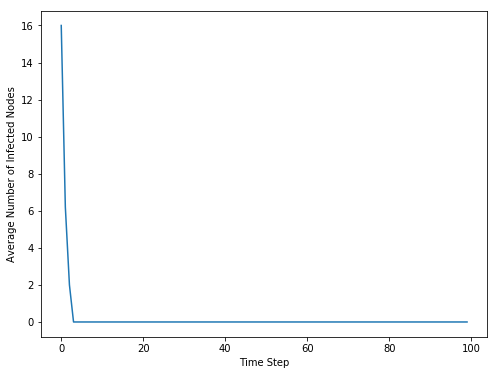

In [4]:
# This cell simulates for one combination of parameters 
letsPredict_1 = Pandemic(beta_1, delta_1, num_vaccines_1)

graph_1 = letsPredict_1.getGraph(filename)
letsPredict_1.predictPandemic(letsPredict_1.getStrength(graph_1))
letsPredict_1.run_simulations(graph_1, simulation_count = 5, time_step_per_simulation = 100, initially_infected_nodes_perc = 5)

#### 2. Parameters
 - Beta = 0.2
 - Delta = 0.7
 - Vaccines available = [15, 20, 25, ...50]

Virus strength is enough to cause a Pandemic :(


Initially affected: 16.0
Finally affected: 169.6


Simulation results show that the virus caused a pandemic....


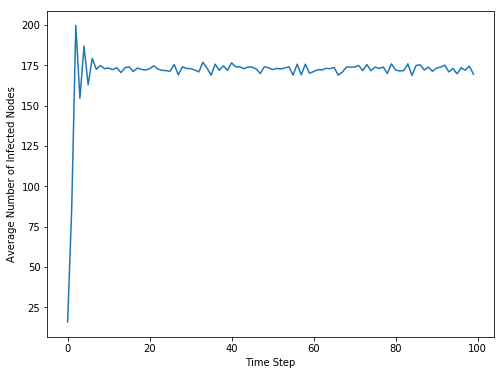

In [5]:
# This cell simulates for another combination of parameters 
letsPredict_2 = Pandemic(beta_2, delta_2, num_vaccines_2)
graph_2 = letsPredict_2.getGraph(filename)


letsPredict_2.predictPandemic(letsPredict_2.getStrength(graph_2))
letsPredict_2.run_simulations(graph_2, simulation_count = 5, time_step_per_simulation = 100, initially_infected_nodes_perc = 5)

# Lets Immunize!

#### 1. Parameters
 - Beta = 0.01
 - Delta = 0.6
 - Vaccines available = [20, 21, 22,....30]

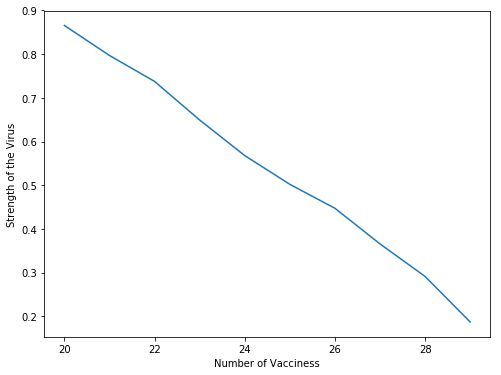

In [6]:
letsPredict_1.runImmunization(graph_1, "first")

#### 2. Parameters
 - Beta = 0.2
 - Delta = 0.7
 - Vaccines available = [15, 20, 25, ...50]

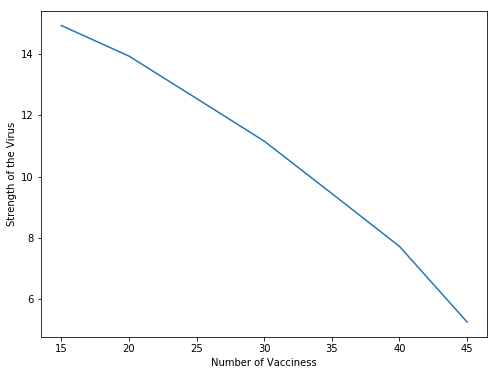

In [7]:
letsPredict_2.runImmunization(graph_2, "first")